In [0]:
#The main purpose of Linear autoencoder is for dimensionality reduction like principal component analysis.
#Here we will be reducing a 30 dimension data into 2 dimensions and plotting it finally. 

In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#read data
df=pd.read_csv("anonymized_data.csv")

In [0]:
#show data
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Scaling the data with minmax scaler
scaler=MinMaxScaler()

data=df.drop("Label",axis=1)
scaled_data=scaler.fit_transform(data)

In [0]:
#Import tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected


In [0]:
#declaring constants
num_inputs = 30 
num_hidden = 2
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate =0.01 


In [0]:
#Define placeholders
X=tf.placeholder(tf.float32,shape=[None,30])

In [0]:
#MAIN COMPUTATIONAL GRAPH
hidden_layer=fully_connected(X,num_hidden,activation_fn=None)
output_layer=fully_connected(hidden_layer,num_outputs,activation_fn=None)

In [0]:
#define loss function

loss=tf.reduce_mean(tf.square(output_layer-X))

In [0]:
#Using adam optimizer with a learing rate of0.01
optimizer=tf.train.AdamOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [0]:
#to initialize all the variables
init=tf.global_variables_initializer()

In [0]:
#Creating the session

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train,feed_dict={X:scaled_data})
    
    reduced_x=hidden_layer.eval(feed_dict={X:scaled_data})

In [0]:
#To confirm that data is reduced to 2 dimenstions from 30 dimensions

(500, 2)

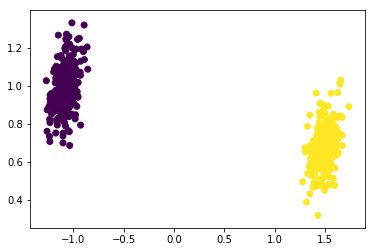

In [0]:
#Plotting our final data in 2 dimensions.
plt.scatter(reduced_x[:,0],reduced_x[:,1],c=df["Label"])